In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/ames-housing-dataset/AmesHousing.csv


EDA

#### For the preparations, let's first import the necessary libraries and load the necessary files for our EDA.
#### Para as preparações, vamos primeiro importar as bibliotecas necessárias e carregar os arquivos necessários para nossa análise exploratória de dados (EDA)..

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### From this information we can already see that some features (like Alley and PoolQC) will not be relevant to our exploratory analysis as there are too many missing values. Also, there are so many features to analyze that it may be better to focus on the ones that can give us real information. Let's remove the Id and features with a NaN value of 30% or less.

#### A partir dessas informações, já podemos ver que algumas características (como Alley e PoolQC) não serão relevantes para nossa análise exploratória, pois há muitos valores ausentes. Além disso, há tantas características a serem analisadas que pode ser melhor focar naquelas que podem nos fornecer informações reais. Vamos remover o Id e as características com mais de 30% de valores ausentes.

In [5]:
# df.count(), Excluir valores NaN
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("Lista das colunas descartadas:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')

Lista das colunas descartadas: Id, Alley, PoolQC, Fence, MiscFeature, 



In [6]:
df = df2

#### Note: If we take the features we just removed and look at their descriptions in the "data_description.txt" file, we can deduce that these features may not be available in all houses (which explains the "NaN" values). We can convert them to categorical dummy values ​​in our next Data preparation/cleaning notebook.

#### Nota: se pegarmos as características que acabamos de remover e olharmos suas descrições no arquivo "data_description.txt", podemos deduzir que essas características podem não estar disponíveis em todas as casas (o que explica os valores "NaN"). Podemos convertê-las em valores categóricos dummy em nosso próximo notebook de preparação/limpeza de dados.

#### Let's take a look at how house prices are distributed.
#### Vamos dar uma olhada em como os preços das casas estão distribuídos.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


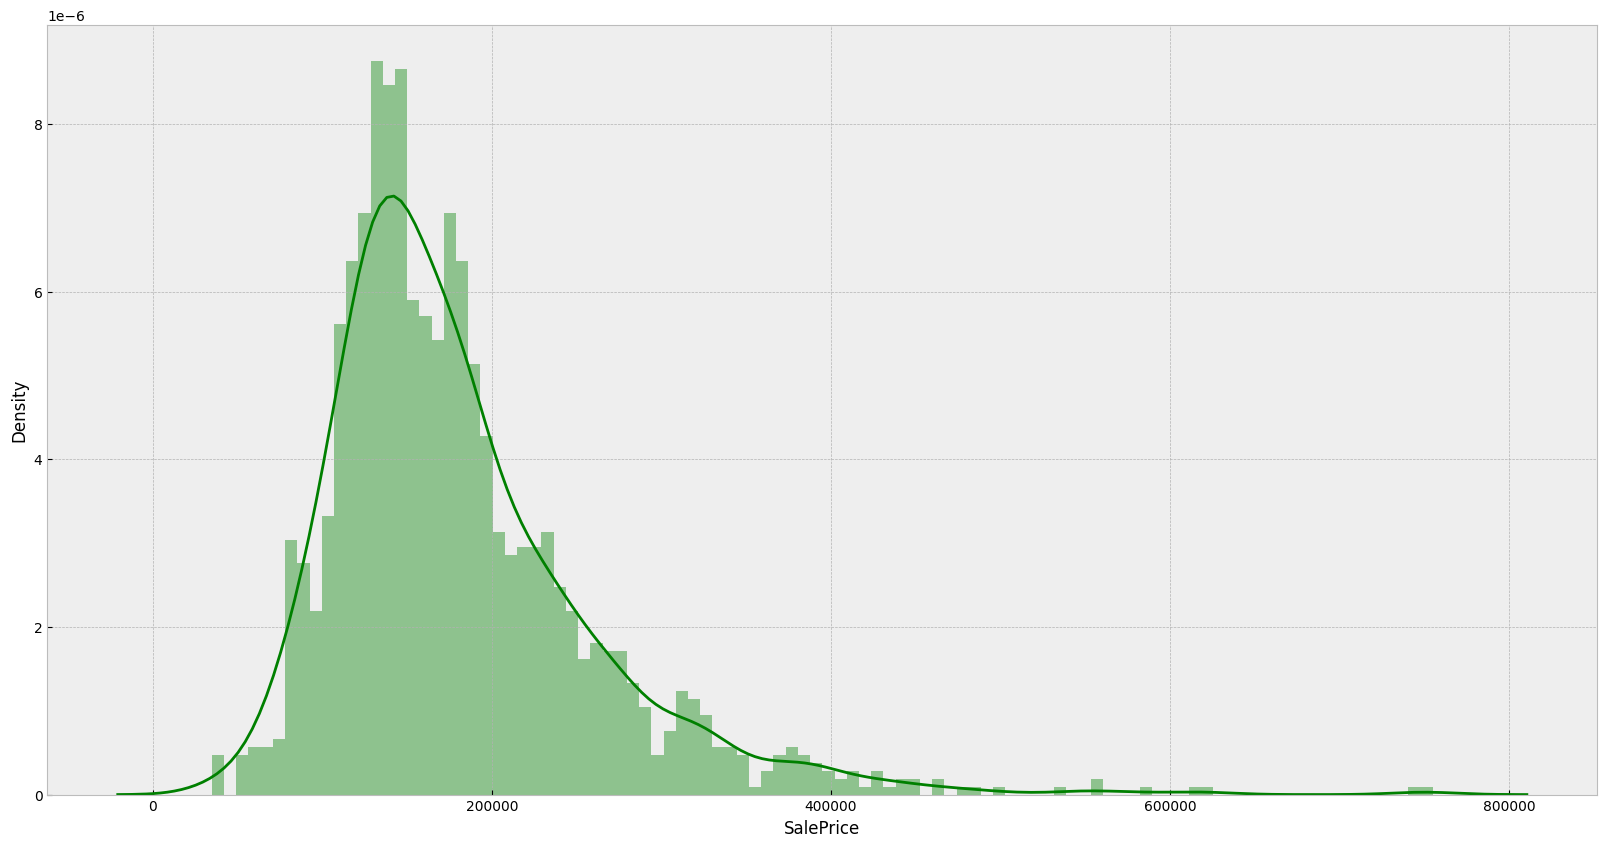

In [7]:
print(df['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### With this information we can see that prices are skewed to the right and some extreme values ​​are above ~500,000. Finally, we'll want to get rid of these to get the normal distribution of the argument ("SalePrice") for machine learning.

#### Com essas informações, podemos ver que os preços estão distorcidos para a direita e que alguns valores extremos estão acima de ~500.000. Finalmente, vamos querer remover esses valores para obter a distribuição normal do argumento ("SalePrice") para aprendizado de máquina.

### Digital data distributio / Distribuição de dados digitais

#### For this part, let's graph all the features and look at their distribution. To do this, let's first list all the data types in our dataset and only get the numeric ones:

#### Para esta parte, vamos criar gráficos para todas as características e observar sua distribuição. Para isso, vamos primeiro listar todos os tipos de dados em nosso conjunto de dados e selecionar apenas os numéricos.

In [8]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


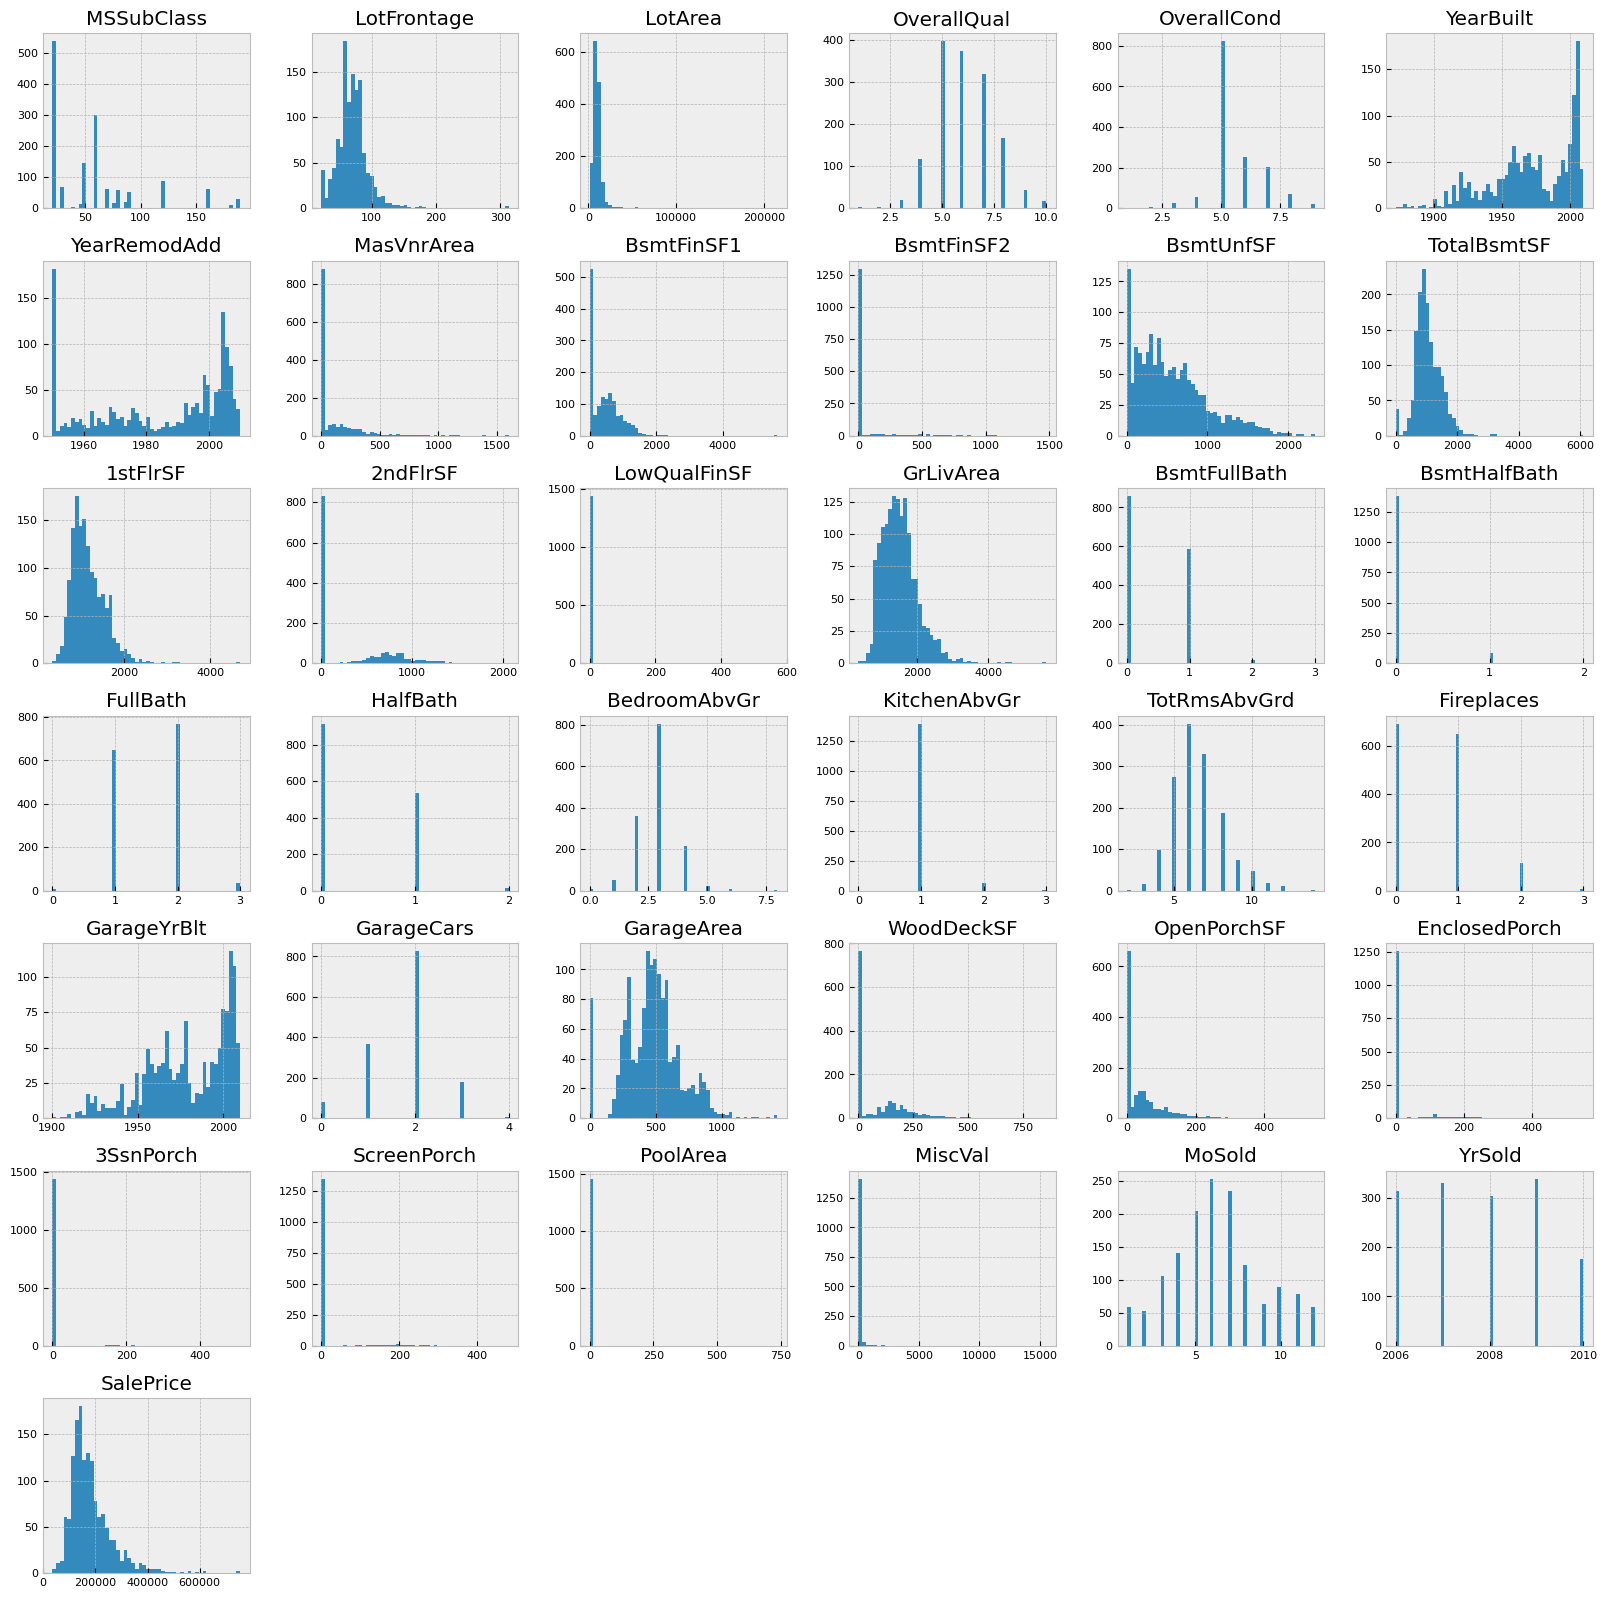

In [10]:
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; --> Não se aprofundar nos detalhes do matplotlib.

#### Features like `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`... seem to share a distribution similar to what we have with `SalePrice`.

#### Essas características, como 1stFlrSF, TotalBsmtSF, LotFrontage, GrLiveArea... parecem compartilhar uma distribuição semelhante àquela que temos com SalePrice.

### Correlation / Correlação 

#### Now we will try to find out which features are strongly associated with SalePrice. We will store them in a variable called golden_features_list. To do this we will reuse our df_num dataset.

#### Agora vamos tentar descobrir quais características estão fortemente associadas ao SalePrice. Vamos armazená-las em uma variável chamada golden_features_list. Para fazer isso, vamos reutilizar nosso conjunto de dados df_num.

In [11]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 porque a última linha é SalePrice

In [12]:
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Há {} valores fortemente associados com SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

Há 10 valores fortemente associados com SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


#### Excellent, we now have a list of strongly correlated values, but this list is incomplete as we know correlation is affected by outliers.
#### So we can proceed as follows:
#### Plot the numeric features and see which ones have few or explainable outliers Remove outliers from those features and see which ones can have a good correlation without outliers
#### Btw, correlation alone doesn't always explain the relationship between data so plotting them can even lead us to new insights and likewise check if our correlated values ​​have a linear relationship to SalePrice.
#### For example, relationships such as curvilinear relationships cannot be predicted just by looking at the correlation value, so let's take the features we extracted from our correlation table and plot them to see if they show some kind of pattern.


###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Excelente, agora temos uma lista de valores fortemente correlacionados, mas esta lista está incompleta, pois sabemos que a correlação é afetada por valores atípicos.
#### Então podemos proceder da seguinte forma: 
#### Plotar as características numéricas e ver quais têm poucos ou explicáveis valores atípicos. Remover os valores atípicos dessas características e ver quais podem ter uma boa correlação sem valores atípicos.
#### Aliás, a correlação sozinha nem sempre explica a relação entre os dados, então plotá-los pode até nos levar a novas perspectivas e também verificar se nossos valores correlacionados têm uma relação linear com o Preço de Venda. 
#### Por exemplo, relações como relações curvilíneas não podem ser previstas apenas olhando para o valor da correlação, então vamos pegar as características que extraímos de nossa tabela de correlação e plotá-las para ver se mostram algum tipo de padrão.

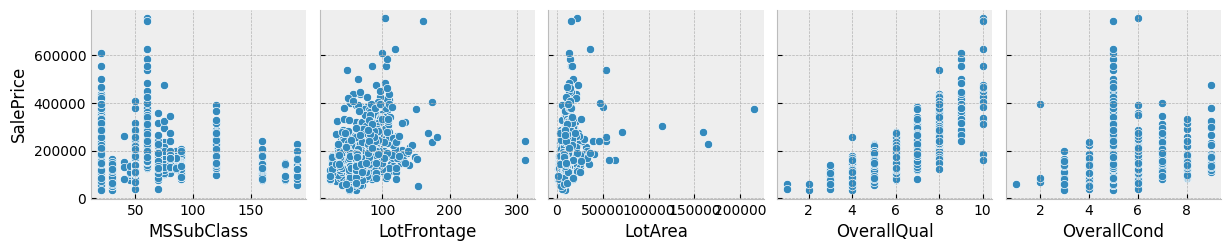

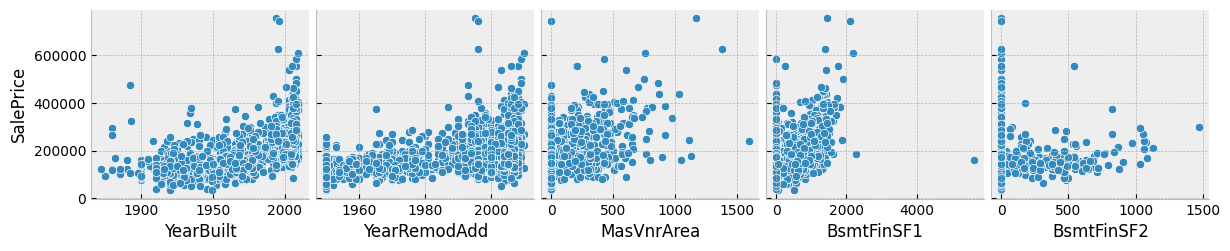

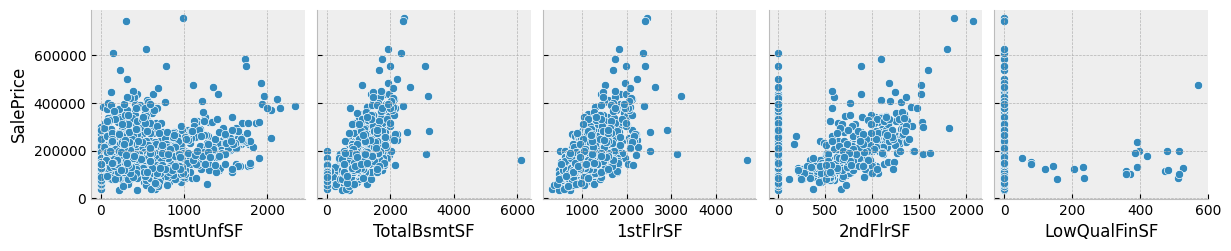

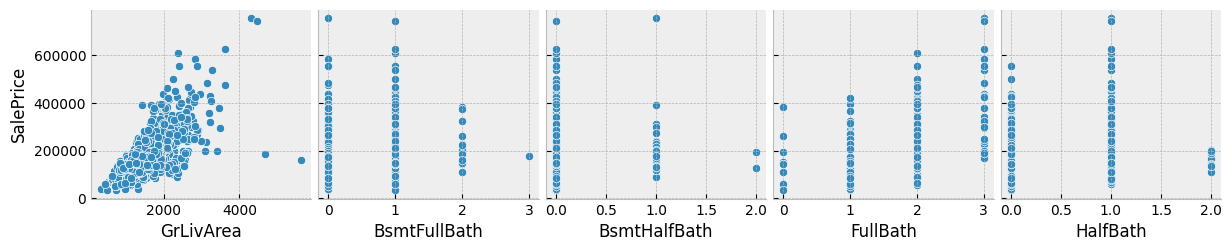

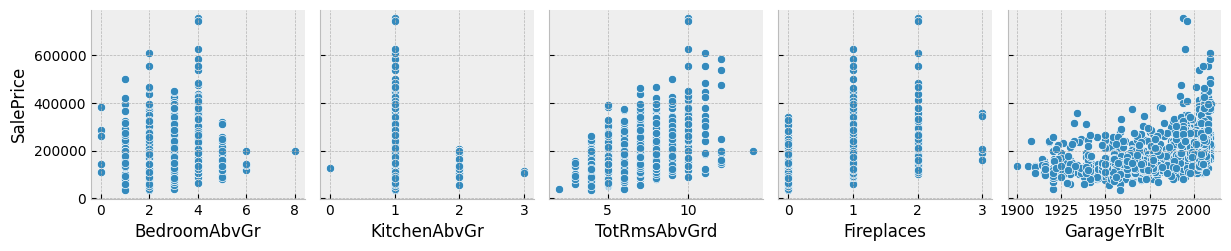

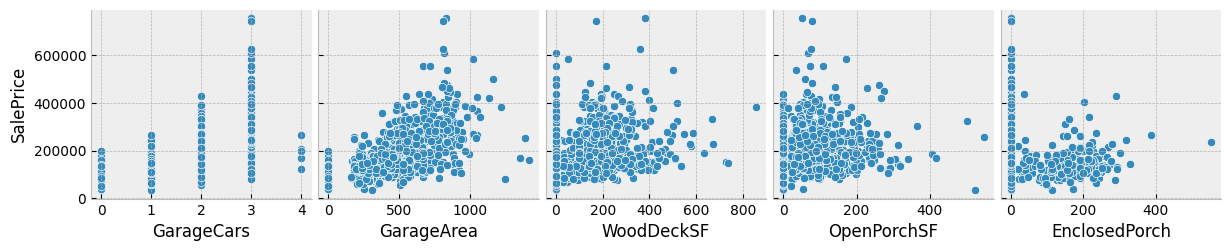

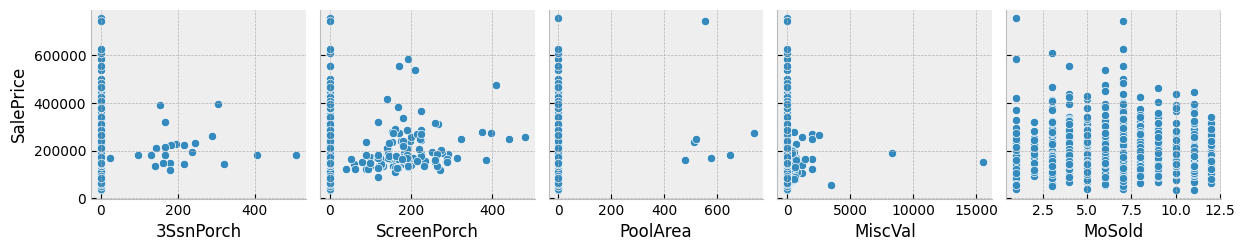

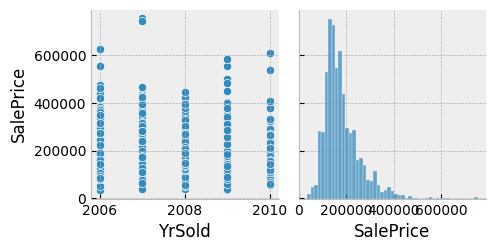

In [13]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

#### We can clearly define some relationships. Many of them seem to have a linear relationship with the Sale Price, and if we look closely at the data, we can see that many data points are located above x = 0, which may indicate the absence of such a feature at home.
#### Let's take OpenPorchSF, I doubt all houses have patios (eg mine doesn't but someday... yes someday...)

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### Podemos claramente definir algumas relações. Muitas delas parecem ter uma relação linear com o Preço de Venda, e se olharmos de perto os dados, podemos ver que muitos pontos de dados estão localizados acima de x = 0, o que pode indicar a ausência de tal característica na casa. Vamos pegar OpenPorchSF, duvido que todas as casas tenham varandas (por exemplo, a minha não tem, mas um dia... sim, um dia...)

##### Now let's remove these 0 values ​​and repeat the process of finding the associated values:

##### Agora vamos remover esses valores 0 e repetir o processo de encontrar os valores associados.

In [14]:
import operator

In [15]:
individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 porque a última coluna é SalePrice.
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

In [16]:
all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

#### By cleaning the data a bit, we found another strongly correlated value. Now our golden_features_list variable looks like this:

#### Ao limpar um pouco os dados, encontramos outro valor fortemente correlacionado. Agora nossa variável golden_features_list se parece com isto:

In [17]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("Há {} valores fortemente associados com SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

Há 11 valores fortemente associados com SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


#### We found estimators strongly correlated with "SalePrice". Then with feature engineering we can add dummy values ​​where the value of a particular feature would be > 0 (existence of such a feature) and 0 would be 0. For example, for "2ndFlrSF" we can create a dummy value for its presence or absence and finally aggregate it as '1stFlrSF'.


#### Encontramos estimadores fortemente correlacionados com "SalePrice". Em seguida, com a engenharia de recursos, podemos adicionar valores fictícios onde o valor de um recurso específico seria > 0 (existência desse recurso) e 0 seria 0. Por exemplo, para "2ndFlrSF", podemos criar um valor fictício para sua presença ou ausência e, finalmente, agregá-lo como '1stFlrSF'.

### Solution / Solução
#### By looking at the correlation between numeric values, we discovered 11 properties that have a strong correlation with the price of a house. Besides correlation, we did not find any notable patterns in the non-correlated data.
 
#### Ao analisarmos a correlação entre valores numéricos, descobrimos 11 propriedades que têm uma forte correlação com o preço de uma casa. Além da correlação, não encontramos nenhum padrão significativo nos dados não correlacionados.

### Notes / Notas
#### There may be some models that I cannot identify due to my lack of expertise. Some values ​​like GarageCars -> SalePrice or Fireplaces -> SalePrice show a specific pattern with vertical lines, roughly meaning they are discrete variables with a short range, but I don't know if they need some kind of "special treatment".

#### Pode haver alguns modelos que eu não consigo identificar devido à minha falta de expertise. Alguns valores como GarageCars -> SalePrice ou Fireplaces -> SalePrice mostram um padrão específico com linhas verticais, significando aproximadamente que são variáveis discretas com um intervalo curto, mas eu não sei se precisam de algum tipo de "tratamento especial".

### Feature-Feature Relationship / Relacionamento entre Recursos 
#### Trying to plot all numerical properties in a binary chart born in the sea will take a lot of time and be difficult to interpret. Seeing if some variables are related to each other and then working out their relationship with common sense.

#### Tentar plotar todas as propriedades numéricas em um gráfico binário nascido no mar levará muito tempo e será difícil de interpretar. É melhor verificar se algumas variáveis estão relacionadas entre si e, em seguida, entender sua relação com bom senso.

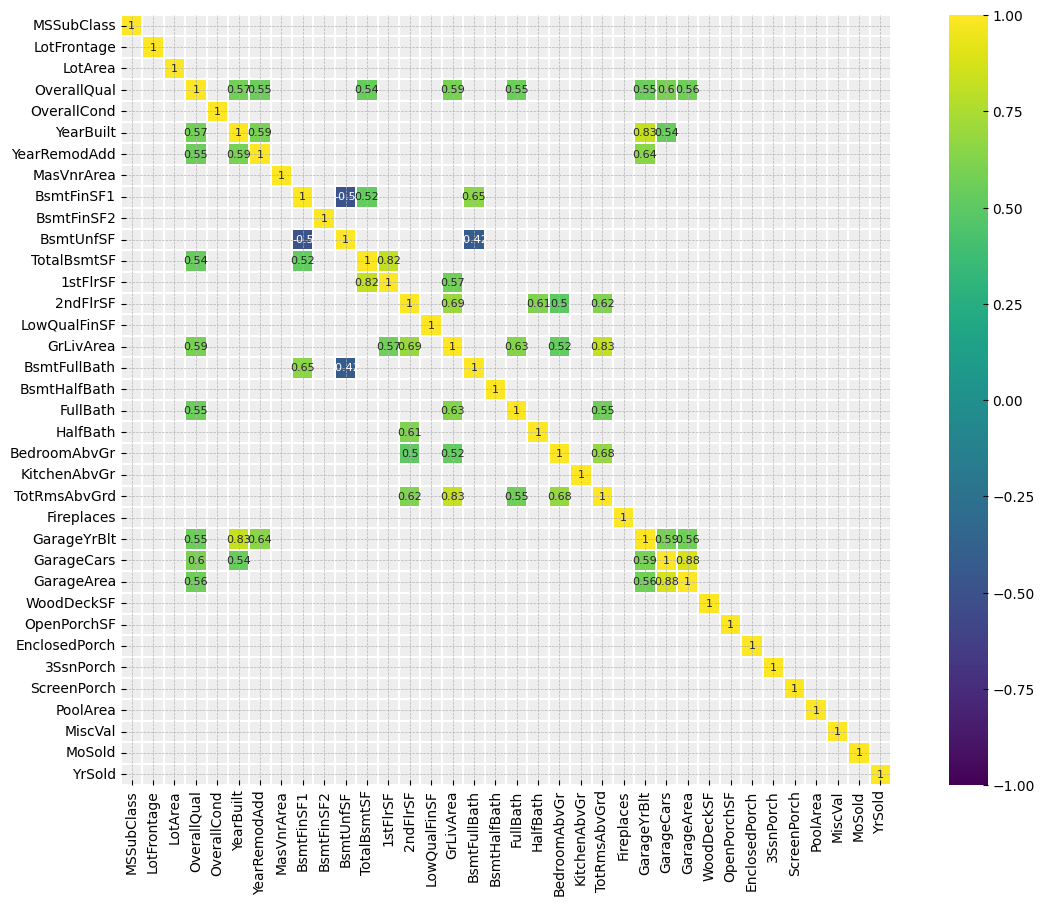

In [18]:
corr = df_num.drop('SalePrice', axis=1).corr() # Já examinamos as correlações com SalePrice.
plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Many features seem to be related, but some, such as YearBuild/GarageYrBlt, can show price inflation over the years. As for 1stFlrSF/TotalBsmtSF, the larger the 1st floor (considering that most houses only have 1 story), it is normal for the total basement to be larger.

#### Muitas características parecem estar relacionadas, mas algumas, como YearBuild/GarageYrBlt, podem mostrar inflação de preço ao longo dos anos. Quanto a 1stFlrSF/TotalBsmtSF, quanto maior o primeiro andar (considerando que a maioria das casas tem apenas um andar), é normal que o porão total seja maior.

### Q -> Q (Quantitative - Quantitative relationship) / Q -> Q (Relação quantitativa)


#### Now let's examine the quantitative properties of our dataframe and how they relate to SalePrice, which is also quantitative (hence the Q -> Q relationship). I will do this analysis with the help of the Q -> Q section of the Stanford MOOC.

#### Connection code Some features of our dataset are categorical. Let's refer to the data_description.txt file to separate categorical features from quantitative ones. According to this file we get the following columns:

#### Agora vamos examinar as propriedades quantitativas do nosso dataframe e como elas se relacionam com SalePrice, que também é quantitativa (daí a relação Q -> Q). Vou fazer essa análise com a ajuda da seção Q -> Q do curso online da Universidade de Stanford.

#### Algumas características do nosso conjunto de dados são categóricas. Vamos nos referir ao arquivo data_description.txt para separar as características categóricas das quantitativas. De acordo com este arquivo, obtemos as seguintes colunas:

In [19]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [20]:
df_quantitative_values = df[quantitative_features_list]

In [21]:
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


#### Still, we have a lot of features to analyze here, so let's extract the strongly correlated quantitative features from this dataset and analyze them one by one. 

#### Ainda assim, temos muitas características para analisar aqui, então vamos extrair as características quantitativas fortemente correlacionadas deste conjunto de dados e analisá-las uma a uma.

In [22]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]

In [23]:
features_to_analyse.append('SalePrice')

In [24]:
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

#### Let's look at their distribution.
#### Vamos analisar a distribuição dessas características.

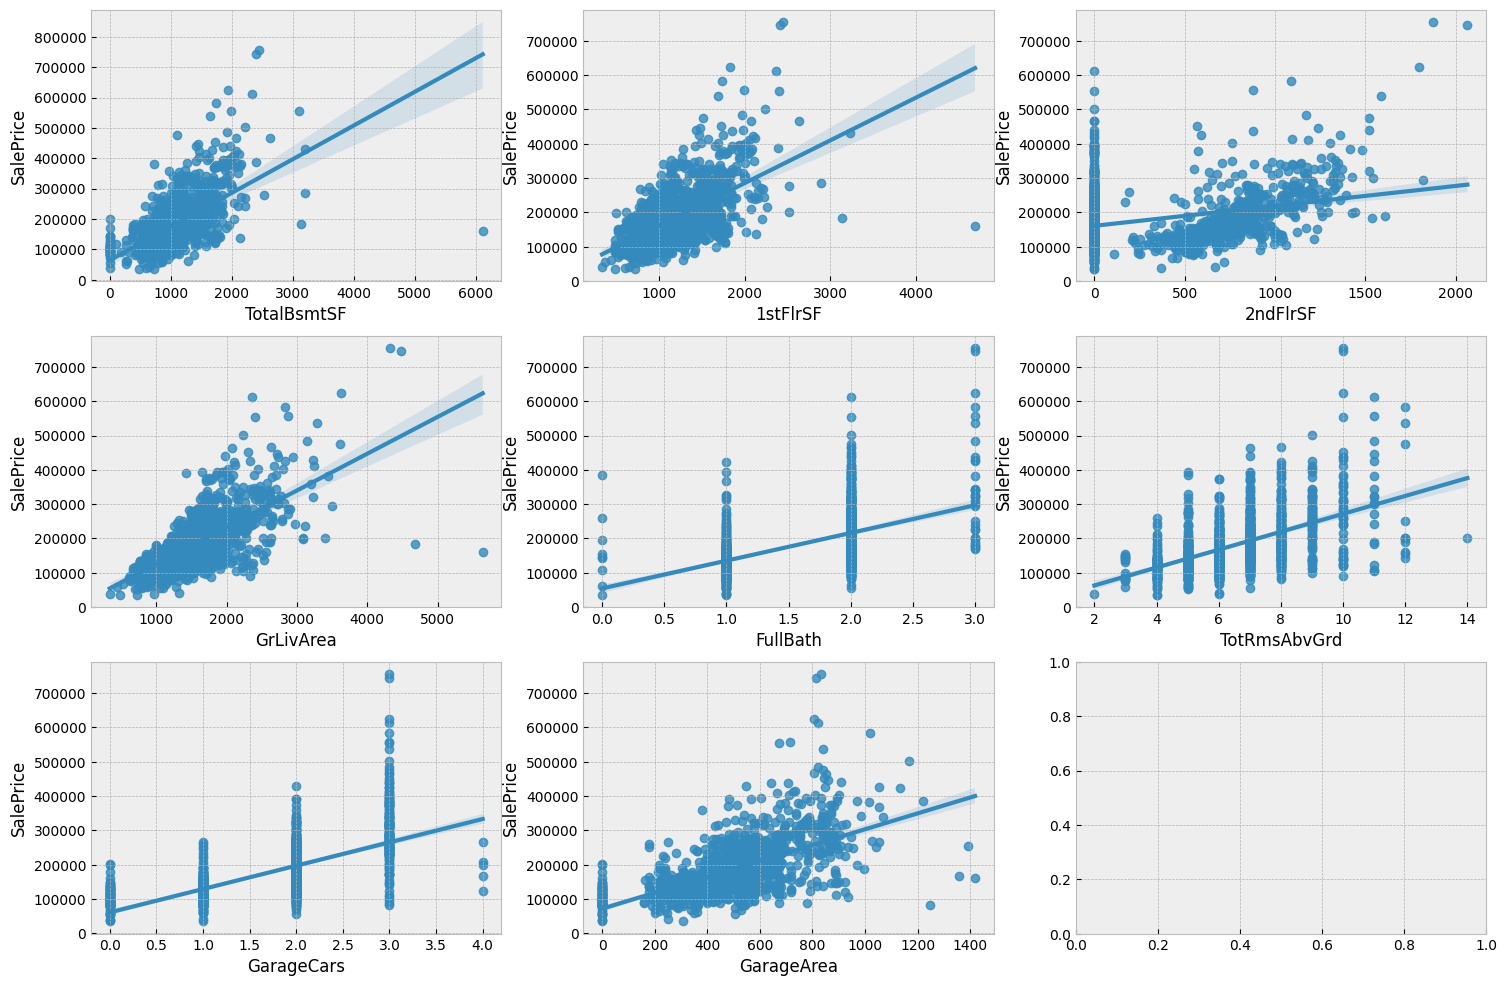

In [25]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

#### We can see that features such as TotalBsmtSF, 1stFlrSF, GrLivArea have a wide distribution, but I cannot say what insights this information gives us.

#### Podemos ver que características como TotalBsmtSF, 1stFlrSF e GrLivArea têm uma distribuição ampla, mas não posso dizer exatamente quais insights essas informações nos fornecem.

### C -> Q (Categorical - Quantitative relationship) / C -> Q (A relação entre variáveis ​​categóricas e quantitativas)

#### Let's take all the categorical features of our dataset and see if we can find any insight in them. Instead of reopening our data_description.txt file and checking which data is categorical, let's just remove the quantitative_features_list from our entire dataframe.

#### Vamos pegar todas as características categóricas do nosso conjunto de dados e ver se podemos encontrar alguma ideia nelas. Em vez de abrir novamente o arquivo data_description.txt para verificar quais dados são categóricos, vamos simplesmente remover a lista de características quantitativas de todo o nosso dataframe.

In [26]:
# quantitative_features_list[:-1] Porque a última coluna é SalePrice e queremos mantê-la.
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]

In [27]:
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


#### Don't forget non-numeric attributes too
#### Não se esqueça das características não numéricas

In [28]:
f_not_num = df_categ.select_dtypes(include=['O'])
print('Incluindo os seguintes {} recursos não numéricos:\n{}'.format(len(f_not_num.columns), f_not_num.columns.tolist()))

Incluindo os seguintes 39 recursos não numéricos:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


#### When we look at these properties, we can see that most of them are of type `Object(O)`. For example, "ExterQual" can be converted to an ordered categorical object.

#### Ao olhar para essas características, podemos ver que a maioria delas é do tipo `Object (O)`. Por exemplo, "ExterQual" pode ser transformado em um objeto categórico ordinal.

#### Vamos plotar alguns deles agora.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Mn'), Text(3, 0, 'Av')])

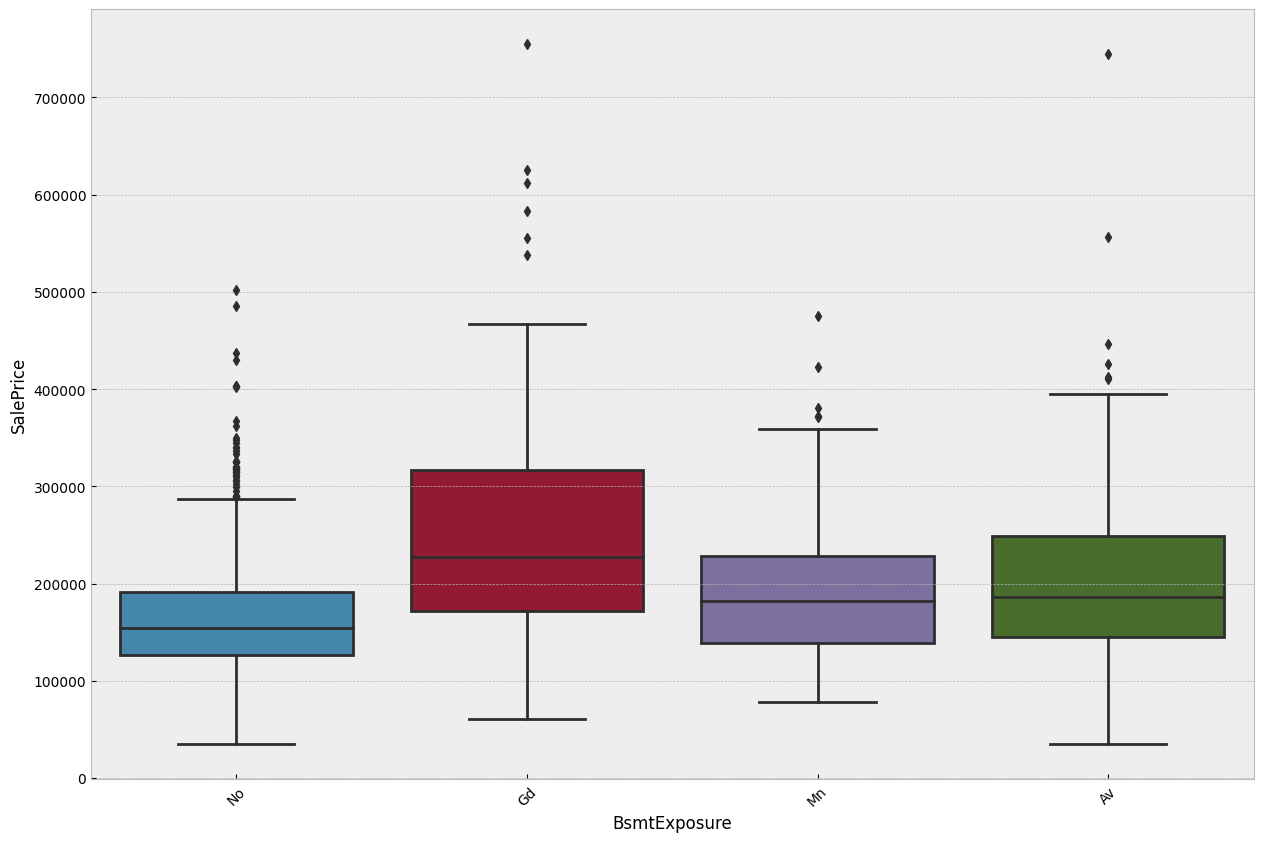

In [29]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

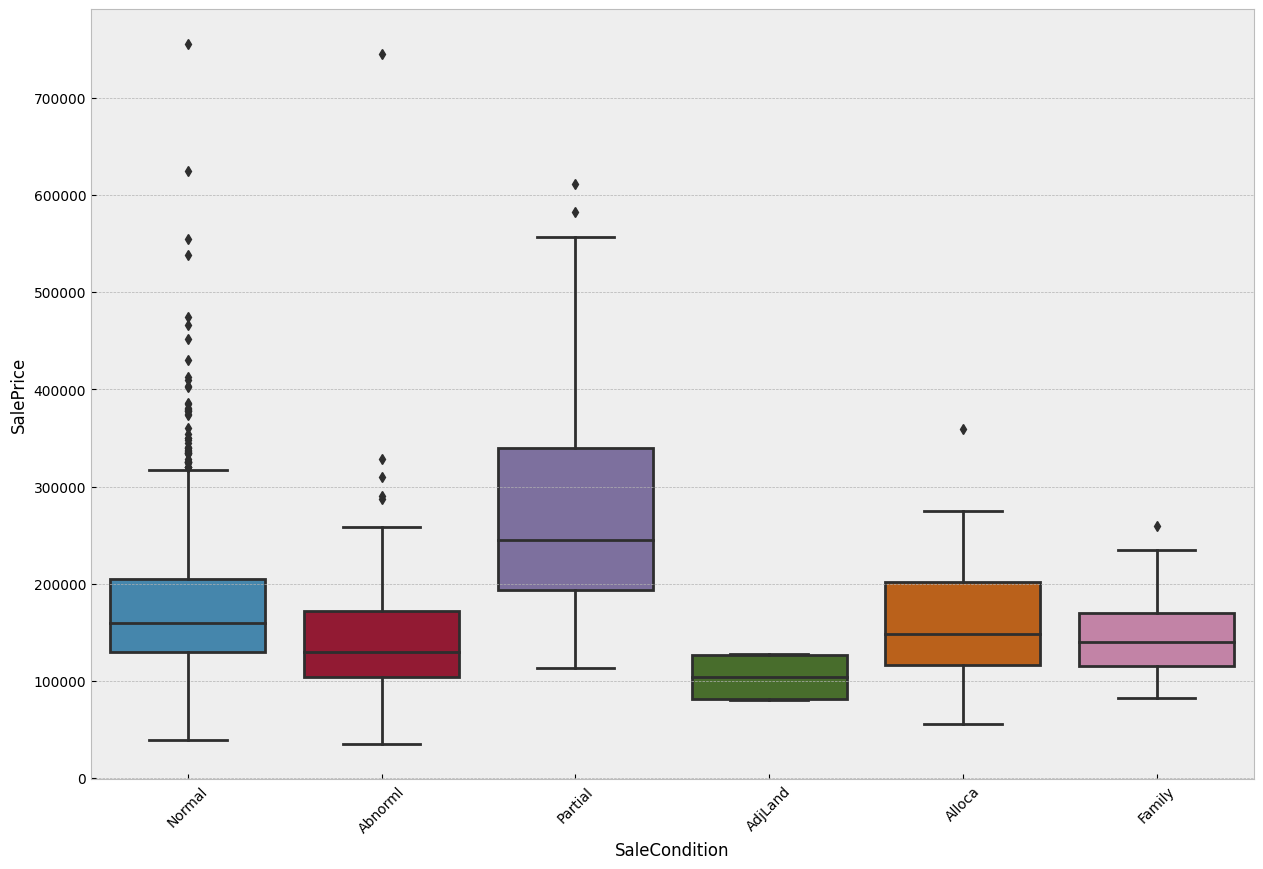

In [30]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#### And finally let's look at their distribution
#### E finalmente, vamos dar uma olhada em suas distribuições

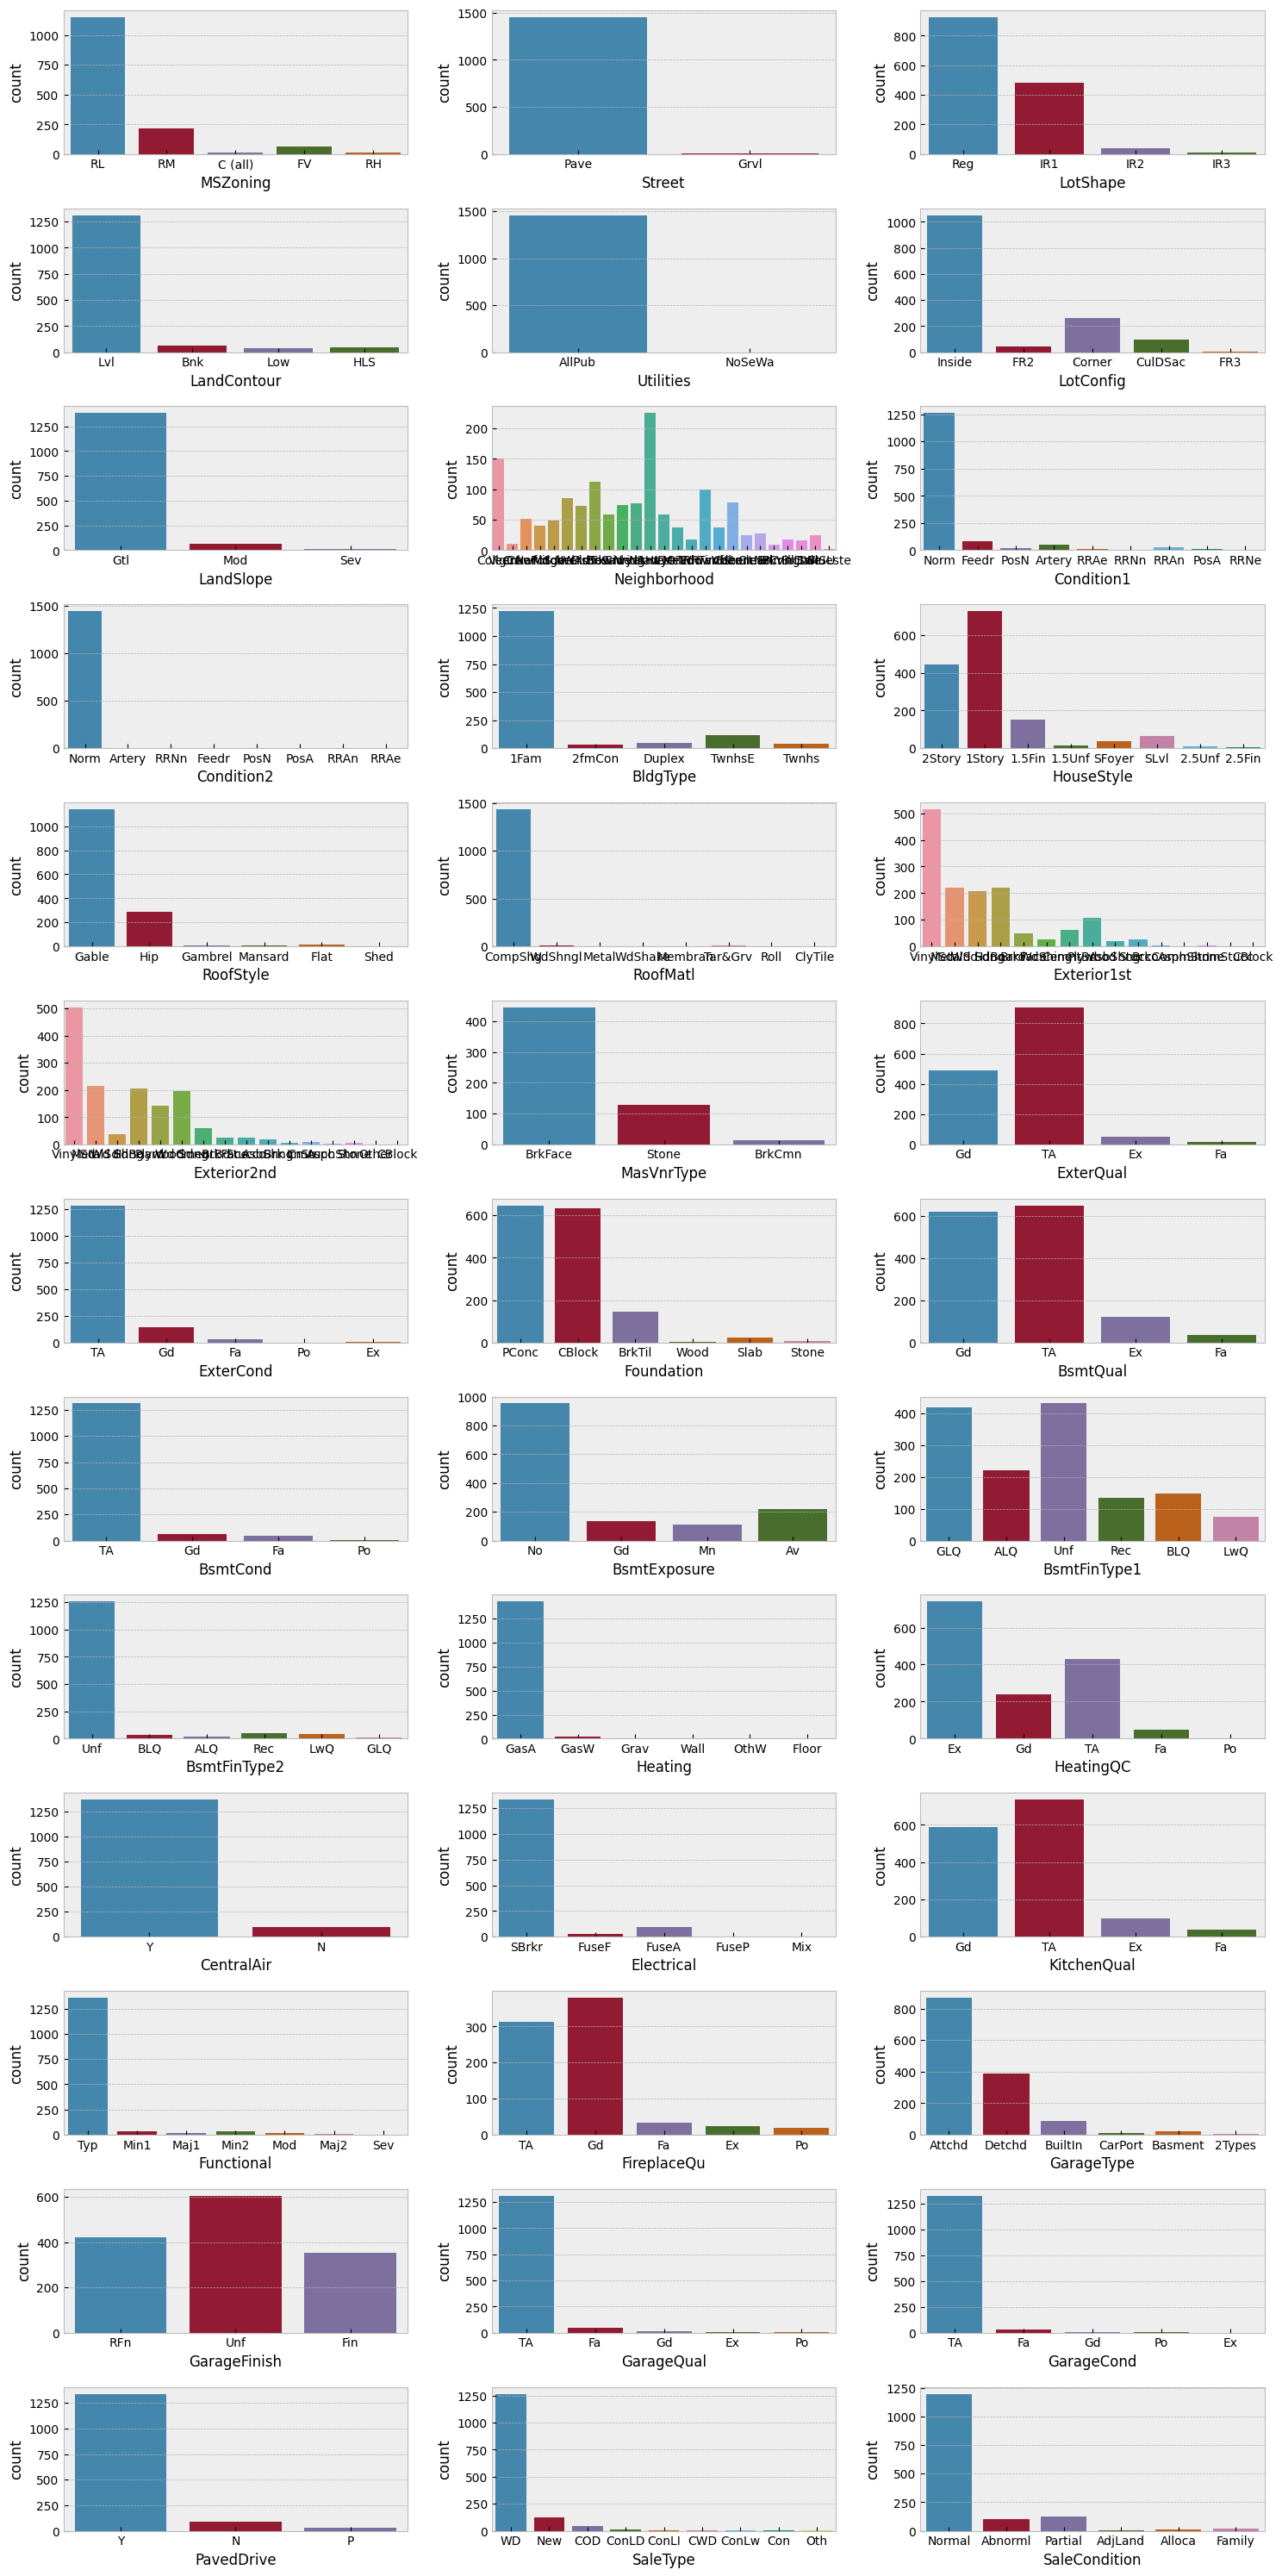

In [31]:
fig, axes = plt.subplots(round(len(f_not_num.columns) / 3), 3, figsize=(15, 30))
for i, ax in enumerate(fig.axes):
    if i < len(f_not_num.columns):
        sns.countplot(x=f_not_num.columns[i], data=f_not_num, ax=ax)
plt.tight_layout()
plt.show()


#### Podemos observar que algumas categorias são dominantes para características como Utilities, Heating, GarageCond, Functional... Essas características podem não ser adequadas para o nosso modelo de previsão

### Modelagem

In [32]:
import pandas as pd
from tqdm import tqdm

In [33]:
train = pd.read_csv('../input/ames-housing-dataset/AmesHousing.csv')
train.drop(['PID'], axis=1, inplace=True)
origin = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train.columns = origin.columns
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [34]:
print(f'O número de linhas nos dados de treinamento: {train.shape[0]}')
print(f'O número de colunas nos dados de treinamento: {train.shape[1]}')
print(f'O número total de valores nos dados de treinamento: {train.count().sum()}')
print(f'O número de valores ausentes nos dados de treinamento: {sum(train.isna().sum())}')
train.head()

O número de linhas nos dados de treinamento: 2930
O número de colunas nos dados de treinamento: 81
O número total de valores nos dados de treinamento: 221581
O número de valores ausentes nos dados de treinamento: 15749


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [35]:
print(f'O número de linhas nos dados de origem: {origin.shape[0]}')
print(f'O número de colunas nos dados de origem.: {origin.shape[1]}')
print(f'O número total de valores nos dados de origem.: {origin.count().sum()}')
print(f'O número de valores ausentes nos dados de origem: {sum(origin.isna().sum())}')
origin.head()

O número de linhas nos dados de origem: 1460
O número de colunas nos dados de origem.: 81
O número total de valores nos dados de origem.: 110431
O número de valores ausentes nos dados de origem: 7829


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
print(f'número de linhas nos dados de teste: {test.shape[0]}')
print(f'número de colunas nos dados de teste: {test.shape[1]}')
print(f'número total de valores nos dados de teste: {test.count().sum()}')
print(f'número de valores ausentes nos dados de teste: {sum(test.isna().sum())}')
test.head()

número de linhas nos dados de teste: 1459
número de colunas nos dados de teste: 80
número total de valores nos dados de teste: 108842
número de valores ausentes nos dados de teste: 7878


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [37]:
print(f'número de linhas nos dados de submissão: {submission.shape[0]}')
print(f'número de colunas nos dados de submissão: {submission.shape[1]}')
print(f'número total de valores nos dados de submissão: {submission.count().sum()}')
print(f'número de valores ausentes nos dados de submissão: {sum(submission.isna().sum())}')
submission.head()

número de linhas nos dados de submissão: 1459
número de colunas nos dados de submissão: 2
número total de valores nos dados de submissão: 2918
número de valores ausentes nos dados de submissão: 0


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


#### Eliminar valores ausentes

In [38]:
missing = test.isnull().sum()
missing = missing[missing>0]

In [39]:
train.drop(missing.index, axis=1, inplace=True)
train.drop(['Electrical'], axis=1, inplace=True)

In [40]:
test.dropna(axis=1, inplace=True)
test.drop(['Electrical'], axis=1, inplace=True)

In [41]:
l_test = tqdm(range(0, len(test)), desc='Matching')
for i in l_test:
    for j in range(0, len(train)):
        for k in range(1, len(test.columns)):
            if test.iloc[i,k] == train.iloc[j,k]:
                continue
            else:
                break
        else:
            submission.iloc[i, 1] = train.iloc[j, -1]
            break
l_test.close()


Matching: 100%|██████████| 1459/1459 [02:43<00:00,  8.92it/s]


In [42]:
submission.to_csv('submission_house_price.csv', index=False)